## Lab 3

Part 1: generate fake data to anonymize

In [150]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from faker import Faker; 
import pandas as pd; 
from faker.providers.credit_card import Provider as creditcardProivder; 
 

df = pd.DataFrame(columns=['Navn', 'Adresse', 'PersonNr', 'CreditCard', 'ipv4'])
fake = Faker(['no_NO']) #decides the condition for the fake credential -> this instance, we can see the that is use Norwegian setting 

for i in range(0,100):
    row=fake.name(),fake.address(),fake.ssn(),fake.credit_card_number(), fake.ipv4()
    df.loc[i]=row

df.head()

,Navn,Adresse,PersonNr,CreditCard,ipv4
0,Joakim Ali,"Kristiansenmyra 81, 1049 Jakobsen",13074134496,38054962421783,12.193.16.131
1,Nils-Sindre Andresen,"Pettersenstykket 5, 2883 Astridberg",07098606895,4587221532106,170.222.121.9
2,Ann Christensen,"Ahmedekra 1, 1994 Nygård",24105126723,4329243777453244,172.144.226.187
3,Håvard Birkeland,"Bergehavna 7, 3304 Thorsen",26019547972,4712333999766015520,40.60.9.117
4,Hanna Hagen-Paulsen,"Jensentjernet 4, 8173 Myhre",09106938382,4853901013597,21.220.169.239


Task 2: data anonymization

In [151]:
#Waiting for answear from TAs, due to the issues with landromat

### Task 3: Time Series 

In [152]:
dfPlanes = pd.read_csv('https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab3/data/flight.csv')
dfPlanes.head()
dfPlanes['dep_time'] = pd.to_datetime(dfPlanes['dep_time'], errors="coerce") 
dfPlanes['arr_time'] = pd.to_datetime(dfPlanes['arr_time'], errors="coerce")
dfPlanes['sched_arr_time'] = pd.to_datetime(dfPlanes['sched_arr_time'], errors="coerce")
dfPlanes['airTime'] = abs(dfPlanes['dep_time'] - dfPlanes['arr_time'])
dfPlanes['delay'] = abs(dfPlanes['arr_time'] - dfPlanes['sched_arr_time'])


dfPlanes.head()


,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,airTime,delay
0,0,2013-1-1 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,1,2013-1-1 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,0 days 00:25:00
2,2,2013-1-1 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,3,2013-1-1 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,4,2013-1-1 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,0 days 00:08:00


## showing the percent of delay 

<Axes: >

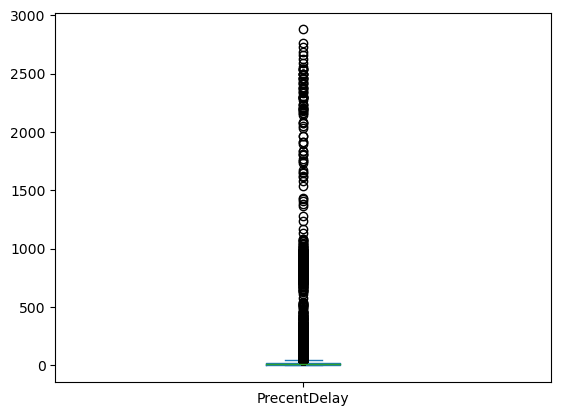

In [153]:

dfPlanes['PrecentDelay'] = (100 * dfPlanes['delay'])/dfPlanes['airTime']
dfPlanes['PrecentDelay'].plot.box()


## creating a scatterplot

i decided to step away from the lab and include the lower and higher five percent. 

In [154]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df): 
    low = 0.5
    high = 0.95
    quant_df = df.quantile([low,high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df 

In [155]:

dfPlanes['PrecentDelay'] = remove_outlier(dfPlanes['PrecentDelay'])
dfPlanes.plot.scatter(x = 'dest',y = 'PrecentDelay')

TypeError: scatter() missing 1 required positional argument: 'x'